In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz


# *Датасеты*

****Telco-Customer: Анализ факторов, влияющих на отток клиентов телекоммуникационной компании****

****Adult Income: Анализ факторов, влияющих на уровень дохода взрослых****

In [3]:
customer_info_df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
adult_income_df = pd.read_csv('adult.csv')

# *Процесс ознакомления с датасетами*

In [ ]:
customer_info_df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [ ]:
adult_income_df

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

In [ ]:
customer_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
adult_income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
customer_info_df.describe()

SeniorCitizen       tenure  MonthlyCharges        Churn
count    7043.000000  7043.000000     7043.000000  7043.000000
mean        0.162147    32.371149       64.761692     0.265370
std         0.368612    24.559481       30.090047     0.441561
min         0.000000     0.000000       18.250000     0.000000
25%         0.000000     9.000000       35.500000     0.000000
50%         0.000000    29.000000       70.350000     0.000000
75%         0.000000    55.000000       89.850000     1.000000
max         1.000000    72.000000      118.750000     1.000000

In [ ]:
adult_income_df.describe()

age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [ ]:
print(f'telco catomers: {customer_info_df.shape}, adult income: {adult_income_df.shape}')

telco catomers: (7043, 21), adult income: (48842, 15)


# *Предварительная обработка данных*

In [ ]:
customer_info_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
adult_income_df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

*Можем заметить, что оба датасета оказались без пропущенных данных, следовательно, это значительно упрощает наш дальнейшний анализ*

***Предварительная обработка датасета telco customers***

In [4]:
customer_info_df = customer_info_df.drop(columns=['customerID'])
# удаляется колонка с id, из-за не надобности

In [5]:
customer_info_df['Churn'] = LabelEncoder().fit_transform(customer_info_df['Churn'])
customer_info_df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

      Churn  
0         0  
1         0  
2         1  
3         0  
4         1  
...     ...  
7038      0  
7039      0  
7040      0  
7041      1  
7042      0  

[7043 rows x 20 columns]

*Перевову целевую переменную 'Churn', в бинарны формат, тобеж 1 и 0*

*заметил в избыточность в данных, а именно, в колонке MultipleLines, содержаться три варианта No, Yes и No phone... где двоя из трех отвечают за одно и то же значения, требуется нормализация*

In [6]:
customer_info_df['MultipleLines'] = customer_info_df['MultipleLines'].replace('No phone service', 'No')
customer_info_df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0               No             DSL             No          Yes   
1               No             DSL            Yes           No   
2               No             DSL            Yes          Yes   
3               No             DSL            Yes           No   
4               No     Fiber optic             No           No   
...            ...             ...            ...          ...   
7038           Yes             DSL            Yes           No   
7039           Yes     Fiber optic             No          Yes   
7040            No             DSL            Yes           No   
7041           Yes     Fiber optic             No           No   
7042            No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

      Churn  
0         0  
1         0  
2         1  
3         0  
4         1  
...     ...  
7038      0  
7039      0  
7040      0  
7041      1  
7042      0  

[7043 rows x 20 columns]

*во избежание подобных казусов с бинаризацией в дальнейшем, стоит предпринять меры, а именно, придумать метод который будет наглядно показывать количество вариаций внутри колонки*

In [7]:
unique_elements = customer_info_df.groupby('DeviceProtection').size().index.tolist()
unique_elements

['No', 'No internet service', 'Yes']

*ну вот, метод нашли, теперь следует придумать как масштабировать, что бы работал с несколькими столбцами*

In [8]:
columnsNeedsCheck = [
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "PhoneService",
    "MultipleLines",
    "InternetService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies",
    "Contract",
    "PaperlessBilling",
]

for column in columnsNeedsCheck:
    unique_values = customer_info_df[column].unique()
    print(f"Столбец: {column}")
    print(f"Уникальные значения: {unique_values}")
    print("-" * 40)

Столбец: SeniorCitizen
Уникальные значения: [0 1]
----------------------------------------
Столбец: Partner
Уникальные значения: ['Yes' 'No']
----------------------------------------
Столбец: Dependents
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: PhoneService
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: MultipleLines
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: InternetService
Уникальные значения: ['DSL' 'Fiber optic' 'No']
----------------------------------------
Столбец: OnlineSecurity
Уникальные значения: ['No' 'Yes' 'No internet service']
----------------------------------------
Столбец: OnlineBackup
Уникальные значения: ['Yes' 'No' 'No internet service']
----------------------------------------
Столбец: DeviceProtection
Уникальные значения: ['No' 'Yes' 'No internet service']
----------------------------------------
Столбец: TechSupport
Уникальные значения: ['No' 'Y

In [9]:
for column in columnsNeedsCheck:
    unique_values = customer_info_df[column].unique()
    if len(unique_values) >= 2:
        first_value = unique_values[0]
        if isinstance(first_value, str):
            for value in unique_values:
                if isinstance(value, str) and value.startswith(first_value) and value != first_value:
                    customer_info_df[column] = customer_info_df[column].replace(value, first_value)

for column in columnsNeedsCheck:
    unique_values = customer_info_df[column].unique()
    print(f"Столбец: {column}")
    print(f"Уникальные значения: {unique_values}")
    print("-" * 40)

Столбец: SeniorCitizen
Уникальные значения: [0 1]
----------------------------------------
Столбец: Partner
Уникальные значения: ['Yes' 'No']
----------------------------------------
Столбец: Dependents
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: PhoneService
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: MultipleLines
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: InternetService
Уникальные значения: ['DSL' 'Fiber optic' 'No']
----------------------------------------
Столбец: OnlineSecurity
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: OnlineBackup
Уникальные значения: ['Yes' 'No' 'No internet service']
----------------------------------------
Столбец: DeviceProtection
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: TechSupport
Уникальные значения: ['No' 'Yes']
---------------------------------------

*произошла не увязочка, пожалуй заменю в ручную, посколькуо этот алгоритм не является моей главной задачой на сегодня*

In [10]:
customer_info_df['OnlineBackup'] = customer_info_df['OnlineBackup'].replace('No internet service', 'No')
for column in columnsNeedsCheck:
    unique_values = customer_info_df[column].unique()
    print(f"Столбец: {column}")
    print(f"Уникальные значения: {unique_values}")
    print("-" * 40)

Столбец: SeniorCitizen
Уникальные значения: [0 1]
----------------------------------------
Столбец: Partner
Уникальные значения: ['Yes' 'No']
----------------------------------------
Столбец: Dependents
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: PhoneService
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: MultipleLines
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: InternetService
Уникальные значения: ['DSL' 'Fiber optic' 'No']
----------------------------------------
Столбец: OnlineSecurity
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: OnlineBackup
Уникальные значения: ['Yes' 'No']
----------------------------------------
Столбец: DeviceProtection
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: TechSupport
Уникальные значения: ['No' 'Yes']
----------------------------------------
Столбец: StreamingTV

In [ ]:
customer_info_df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0               No             DSL             No          Yes   
1               No             DSL            Yes           No   
2               No             DSL            Yes          Yes   
3               No             DSL            Yes           No   
4               No     Fiber optic             No           No   
...            ...             ...            ...          ...   
7038           Yes             DSL            Yes           No   
7039           Yes     Fiber optic             No          Yes   
7040            No             DSL            Yes           No   
7041           Yes     Fiber optic             No           No   
7042            No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

      Churn  
0         0  
1         0  
2         1  
3         0  
4         1  
...     ...  
7038      0  
7039      0  
7040      0  
7041      1  
7042      0  

[7043 rows x 20 columns]

*Промежуточный визуальный осмотр датасета*

In [11]:
forBinarization = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                  'StreamingTV', 'StreamingMovies', 'MultipleLines']

label_encoder = LabelEncoder()
for col in forBinarization:
    customer_info_df[col] = label_encoder.fit_transform(customer_info_df[col])

customer_info_df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0                 0             DSL               0             1   
1                 0             DSL               1             0   
2                 0             DSL               1             1   
3                 0             DSL               1             0   
4                 0     Fiber optic               0             0   
...             ...             ...             ...           ...   
7038              1             DSL               1             0   
7039              1     Fiber optic               0             1   
7040              0             DSL               1             0   
7041              1     Fiber optic               0             0   
7042              0     Fiber optic               1             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                    0            0            0                0   
1                    1            0            0                0   
2                    0            0            0                0   
3                    1            1            0                0   
4                    0            0            0                0   
...                ...          ...          ...              ...   
7038                 1            1            1                1   
7039                 1            0            1                1   
7040                 0            0            0                0   
7041                 0            0            0                0   
7042                 1            1            1                1   

            Contract  PaperlessBilling              PaymentMethod  \
0     Month-to-month                 1           Electronic check   
1           One year                 0               Mailed check   
2     Month-to-month                 1               Mailed check   
3           One year                 0  Bank transfer (automatic)   
4     Month-to-month                 1           Electronic check   
...              ...               ...                        ...   
7038        One year                 1               Mailed check   
7039        One year                 1    Credit card (automatic)   
7040  Month-to-month                 1           Electronic check   
7041  Month-to-month                 1               Mailed check   
7042        Two year                 1  Bank transfer (automatic)   

      MonthlyCharges TotalCharges  Churn  
0              29.85        29.85      0  
1              56.95       1889.5      0  
2              53.85       108.15      1  
3              42.30      1840.75      0  
4              70.70       151.65      1  
...              ...          ...    ...  
7038           84.80       1990.5      0  
7039          103.20       7362.9      0  
7040           29.60       346.45      0  
7041           74.40        306.6      1  
7042          105.65       6844.5      0  

[7043 rows x 20 columns]

*после нормализации самих данных, которые по факту были бинарными, но из-за переизбытка похожей информации модель могла собраться не корректно. Во избежание возможных будущих проблем я произвел нормализацию заранее.*

In [12]:
forMultiCategory = ['InternetService', 'Contract', 'PaymentMethod']
customer_info_df = pd.get_dummies(customer_info_df, columns=forMultiCategory, drop_first=True)
customer_info_df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                 0               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                 0               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040              0               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  \
0              29.85         29.85      0                        False   
1              56.95        1889.5      0                        False   
2              53.85        108.15      1                        False   
3              42.30       1840.75      0                        False   
4              70.70        151.65      1                         True   
...              ...           ...    ...                          ...   
7038           84.80        1990.5      0                        False   
7039          103.20        7362.9      0                         True   
7040           29.60        346.45      0                        False   
7041           74.40         306.6      1                         True   
7042          105.65        6844.5      0                         True   

      InternetService_No Contract_One year  Contract_Two year  \
0                  False             False              False   
1                  False              True              False   
2                  False             False              False   
3                  False              True              False   
4                  False             False              False   
...                  ...               ...                ...   
7038               False              True              False   
7039               False              True              False   
7040               False             False              False   
7041               False             False              False   
7042               False             False               True   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                     False                            True   
1                                     False                           False   
2                                     False                           False   
3                                     False                           False   
4                                     False                            True   
...                                     ...                 

In [13]:
customer_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

*промежуточная оценка состояния нормализации данных показала, что таблица "TotalCharges", с виду хоть и типа float, но на деле оказался object. Я уверен, что это не из-за пропущенных данных (NaN), поскольку ранее проводили првоерку, думаю обойдусь простой сменой типа*

In [ ]:
customer_info_df['TotalCharges'] = customer_info_df['TotalCharges'].astype(float)
customer_info_df.info()

ValueError: could not convert string to float: ' '

*аа нет, так понял пустые данные все же имеются, но в другом исполнении. Это как раз и обьясняет возникновение object*

In [14]:
customer_info_df['TotalCharges'] = customer_info_df['TotalCharges'].replace(' ', None)
customer_info_df['TotalCharges'] = customer_info_df['TotalCharges'].astype(float)
customer_info_df['TotalCharges'].fillna(customer_info_df['TotalCharges'].median(), inplace=True)

customer_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

<ipython-input-14-160217b61831>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customer_info_df['TotalCharges'].fillna(customer_info_df['TotalCharges'].median(), inplace=True)


*слегка другая логика, с конвертацией в пусутое число с последущим заполнением пробелом в данных медианными значениями сработала*

In [ ]:
customer_info_df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                 0               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                 0               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040              0               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  \
0              29.85         29.85      0                        False   
1              56.95       1889.50      0                        False   
2              53.85        108.15      1                        False   
3              42.30       1840.75      0                        False   
4              70.70        151.65      1                         True   
...              ...           ...    ...                          ...   
7038           84.80       1990.50      0                        False   
7039          103.20       7362.90      0                         True   
7040           29.60        346.45      0                        False   
7041           74.40        306.60      1                         True   
7042          105.65       6844.50      0                         True   

      InternetService_No  Contract_One year  Contract_Two year  \
0                  False              False              False   
1                  False               True              False   
2                  False              False              False   
3                  False               True              False   
4                  False              False              False   
...                  ...                ...                ...   
7038               False               True              False   
7039               False               True              False   
7040               False              False              False   
7041               False              False              False   
7042               False              False               True   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                     False                            True   
1                                     False                           False   
2                                     False                           False   
3                                     False                           False   
4                                     False                            True   
...                                     ...     

***Предварительная обработка датасета adult income***


In [50]:
adult_income_df

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
4       18             ?  103497  Some-college               10   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation relationship   race  gender  \
0           Never-married  Machine-op-inspct    Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing      Husband  White    Male   
2      Married-civ-spouse    Protective-serv      Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4           Never-married                  ?    Own-child  White  Female   
...                   ...                ...          ...    ...     ...   
48837  Married-civ-spouse       Tech-support         Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct      Husband  White    Male   
48839             Widowed       Adm-clerical    Unmarried  White  Female   
48840       Never-married       Adm-clerical    Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial         Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
4                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[48842 rows x 15 columns]

*новости для меня не самые утешительные, а именно, я осознал что пропуски в данных все же иеются но они в виде '?' думаю просто снесу столбцы которые содержат его, поскольку там имеются пропущенные которые имели категориальные признаки*

In [51]:
adult_income_df = adult_income_df.replace("?", None)
adult_income_df = adult_income_df.dropna()
adult_income_df

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
5       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black    Male   
1      Married-civ-spouse    Farming-fishing        Husband  White    Male   
2      Married-civ-spouse    Protective-serv        Husband  White    Male   
3      Married-civ-spouse  Machine-op-inspct        Husband  Black    Male   
5           Never-married      Other-service  Not-in-family  White    Male   
...                   ...                ...            ...    ...     ...   
48837  Married-civ-spouse       Tech-support           Wife  White  Female   
48838  Married-civ-spouse  Machine-op-inspct        Husband  White    Male   
48839             Widowed       Adm-clerical      Unmarried  White  Female   
48840       Never-married       Adm-clerical      Own-child  White    Male   
48841  Married-civ-spouse    Exec-managerial           Wife  White  Female   

       capital-gain  capital-loss  hours-per-week native-country income  
0                 0             0              40  United-States  <=50K  
1                 0             0              50  United-States  <=50K  
2                 0             0              40  United-States   >50K  
3              7688             0              40  United-States   >50K  
5                 0             0              30  United-States  <=50K  
...             ...           ...             ...            ...    ...  
48837             0             0              38  United-States  <=50K  
48838             0             0              40  United-States   >50K  
48839             0             0              40  United-States  <=50K  
48840             0             0              20  United-States  <=50K  
48841         15024             0              40  United-States   >50K  

[45222 rows x 15 columns]

*удаление прошло не самым болезненным путем, удалилось около 3к столбцом, что не так уж и много на фоно того что у нас было их суммарно 48к*

In [52]:
columnsNeedsCheck2 = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "educational-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "gender",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income"
]

for column in columnsNeedsCheck2:
    unique_values = adult_income_df[column].unique()
    print(f"Столбец: {column}")
    print(f"Уникальные значения: {unique_values}")
    print("-" * 40)

Столбец: age
Уникальные значения: [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84 86]
----------------------------------------
Столбец: workclass
Уникальные значения: ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']
----------------------------------------
Столбец: fnlwgt
Уникальные значения: [226802  89814 336951 ... 199655 255835 257302]
----------------------------------------
Столбец: education
Уникальные значения: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']
----------------------------------------
Столбец: educational-num
Уникальные значения: [ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]
----------------------------------------
Сто

*алгоритм, который я использовал ранее, снова дает знать о себе, думаю, что данный алгоритм отлично подойдет для определения того в каких случаях лучше использовать fit_transoft, а в каких get_dumies. Так же, могу ответить что в этот раз аномали сради данных в виде схожих по смыслу значений не возникает, и это радует*

In [53]:
colsForBinTrans = ['gender', 'income']
for col in colsForBinTrans:
    adult_income_df[col] = LabelEncoder().fit_transform(adult_income_df[col])
adult_income_df

age     workclass  fnlwgt     education  educational-num  \
0       25       Private  226802          11th                7   
1       38       Private   89814       HS-grad                9   
2       28     Local-gov  336951    Assoc-acdm               12   
3       44       Private  160323  Some-college               10   
5       34       Private  198693          10th                6   
...    ...           ...     ...           ...              ...   
48837   27       Private  257302    Assoc-acdm               12   
48838   40       Private  154374       HS-grad                9   
48839   58       Private  151910       HS-grad                9   
48840   22       Private  201490       HS-grad                9   
48841   52  Self-emp-inc  287927       HS-grad                9   

           marital-status         occupation   relationship   race  gender  \
0           Never-married  Machine-op-inspct      Own-child  Black       1   
1      Married-civ-spouse    Farming-fishing        Husband  White       1   
2      Married-civ-spouse    Protective-serv        Husband  White       1   
3      Married-civ-spouse  Machine-op-inspct        Husband  Black       1   
5           Never-married      Other-service  Not-in-family  White       1   
...                   ...                ...            ...    ...     ...   
48837  Married-civ-spouse       Tech-support           Wife  White       0   
48838  Married-civ-spouse  Machine-op-inspct        Husband  White       1   
48839             Widowed       Adm-clerical      Unmarried  White       0   
48840       Never-married       Adm-clerical      Own-child  White       1   
48841  Married-civ-spouse    Exec-managerial           Wife  White       0   

       capital-gain  capital-loss  hours-per-week native-country  income  
0                 0             0              40  United-States       0  
1                 0             0              50  United-States       0  
2                 0             0              40  United-States       1  
3              7688             0              40  United-States       1  
5                 0             0              30  United-States       0  
...             ...           ...             ...            ...     ...  
48837             0             0              38  United-States       0  
48838             0             0              40  United-States       1  
48839             0             0              40  United-States       0  
48840             0             0              20  United-States       0  
48841         15024             0              40  United-States       1  

[45222 rows x 15 columns]

In [54]:
multiCategoryCals = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
adult_income_df = pd.get_dummies(adult_income_df, columns=multiCategoryCals, drop_first=True)
adult_income_df

age  fnlwgt  educational-num  gender  capital-gain  capital-loss  \
0       25  226802                7       1             0             0   
1       38   89814                9       1             0             0   
2       28  336951               12       1             0             0   
3       44  160323               10       1          7688             0   
5       34  198693                6       1             0             0   
...    ...     ...              ...     ...           ...           ...   
48837   27  257302               12       0             0             0   
48838   40  154374                9       1             0             0   
48839   58  151910                9       0             0             0   
48840   22  201490                9       1             0             0   
48841   52  287927                9       0         15024             0   

       hours-per-week  income  workclass_Local-gov  workclass_Private  ...  \
0                  40       0                False               True  ...   
1                  50       0                False               True  ...   
2                  40       1                 True              False  ...   
3                  40       1                False               True  ...   
5                  30       0                False               True  ...   
...               ...     ...                  ...                ...  ...   
48837              38       0                False               True  ...   
48838              40       1                False               True  ...   
48839              40       0                False               True  ...   
48840              20       0                False               True  ...   
48841              40       1                False              False  ...   

       native-country_Portugal  native-country_Puerto-Rico  \
0                        False                       False   
1                        False                       False   
2                        False                       False   
3                        False                       False   
5                        False                       False   
...                        ...                         ...   
48837                    False                       False   
48838                    False                       False   
48839                    False                       False   
48840                    False                       False   
48841                    False                       False   

       native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        False                 False                  False   
1                        False                 False                  False   
2                        False                 False                  False   
3                        False                 False                  False   
5                        False                 False                  False   
...                        ...                   ...                    ...   
48837                    False                 False                  False   
48838                    False                 False                  False   
48839                    False                 False                  False   
48840                    False                 False                  False   
48841                    False                 False                  False   

       native-country_Thailand  native-country_Trinadad&Tobago  \
0                        False                           False   
1                        False                           False   
2                        False                           False   
3                        False                           False   
5                        False                           False   
...                        ...                             ...   
48837        

In [55]:
adult_income_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 48841
Data columns (total 97 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        45222 non-null  int64
 1   fnlwgt                                     45222 non-null  int64
 2   educational-num                            45222 non-null  int64
 3   gender                                     45222 non-null  int64
 4   capital-gain                               45222 non-null  int64
 5   capital-loss                               45222 non-null  int64
 6   hours-per-week                             45222 non-null  int64
 7   income                                     45222 non-null  int64
 8   workclass_Local-gov                        45222 non-null  bool 
 9   workclass_Private                          45222 non-null  bool 
 10  workclass_Self-emp-inc                     45222 no

*на это, оптимезация датасета под построение модели считаю завершенной, на этот раз мороки с данными было гораздо меньше на удивление*

# *Сборка моделей*

Сборка модели датасета telco customers

In [15]:
X = customer_info_df.drop(columns=['Churn'])
y = customer_info_df['Churn']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

*уже знакомое предупреждение, на этот случай у меня уже заготовлена карта*

In [18]:
model = LogisticRegression(solver='liblinear', max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [19]:
y_pred = model.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8183108587650816
Precision: 0.693069306930693
Recall: 0.5630026809651475
F1-score: 0.621301775147929
Confusion Matrix:
 [[943  93]
 [163 210]]


Метрики для определения качества модели.

*'accuracy' (0.80) - это показатель того с какой точносью модель справилась с предсказанием исхода.*

*'Precision' (0.81) - это показатель доли положительных предиктов в рамках правильных положительных и отрицательных предиктов*

*'Recall' (0.77) - это показатель долю правильных положительных предиктов в рамках всех положительных предиктов, в не зависимости от правильности.*

*'f1_score' (0.79) - гармонирует между precision и recall, эта метрика необходима, когда нужно учитывать баланс между точностью и полнотой*

In [26]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

*на данном же этапе, мы воссоздли дерево, то как именно мы это сделали обьясню сейчас. Создали обьект "tree_clf", класса "DecisionTreeClassifier", которому задали определенную переодичность генерации путем присвоения своеобразного ключа 42. Дальше же, применили метод .fit к нашей моедели передав ей обучающую выборку, в виде **"X_train (признаки)"** и "**y_train (целевую переменную)**". Следом, используя обученную модель, мы предсказали значения целевой переменной на тестовой выборке X_test. Метод .predict() возвращает предсказанные классы для каждого примера в X_test и сохраняет их в переменной y_pred_tree.*

In [29]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))

Decision Tree Accuracy: 0.7260468417317246
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1036
           1       0.48      0.46      0.47       373

    accuracy                           0.73      1409
   macro avg       0.65      0.64      0.64      1409
weighted avg       0.72      0.73      0.72      1409

Confusion Matrix:
 [[850 186]
 [200 173]]


*Можем замеить, что модель имеет гораздо более низкий показатель для класса 1, что может указывать на затруднения для модели.*

In [30]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

*по сути, синтаксис построения леса очень схож с пострением дерева, но за исключением того что изменился класс который мы подтягиваем для построения и n_estimators=100 который в свою очередь говорит о том что мы создаем ансамбль из 100 деревьев решений. Каждый из этих деревьев обучается на случайной подвыборке данных, а также случайном подможестве признаков. Итоговое предсказание рандом forest, формирует на основе агрегированных предсказаний всех деревьев, в задачах классификации используется метод голосования, где результатом становится класс, предсказанный большинством деревьев.*

In [31]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7913413768630234
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.86      1036
           1       0.65      0.47      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix:
 [[940  96]
 [198 175]]


*на данном этапе можем увидеть что random forest заметно улусшил общие результаты и класс 1 в честности, но если брать определенные метрики, можно сказать что recall все еще находится в не лучшем виде, что может говорить о том что модель все еще пропускает значительное количество ушедших клиентов*

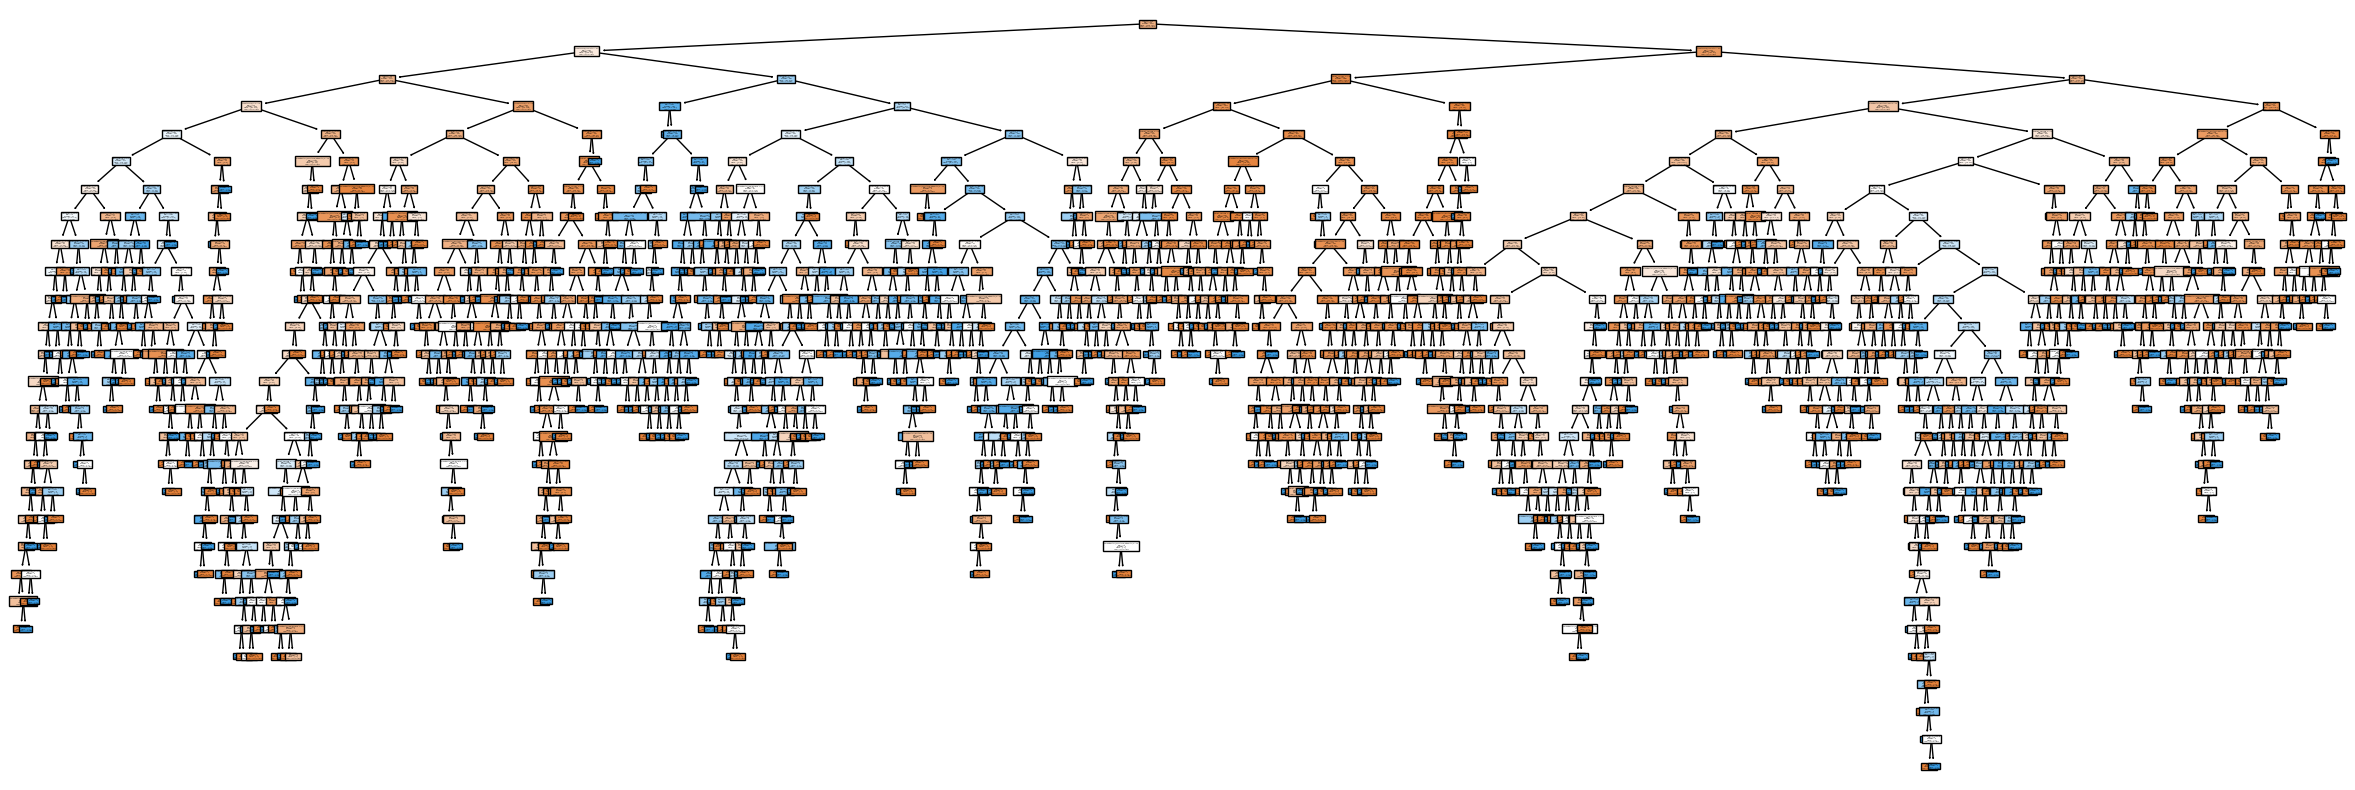

In [49]:
plt.figure(figsize=(30, 10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=["Not Churned", "Churned"])
plt.show()


*можем заметить, что сгенерировалось не самым читабельным образом, поэтому буду искать альтернативным метод, воспроизвести древо визуально.*

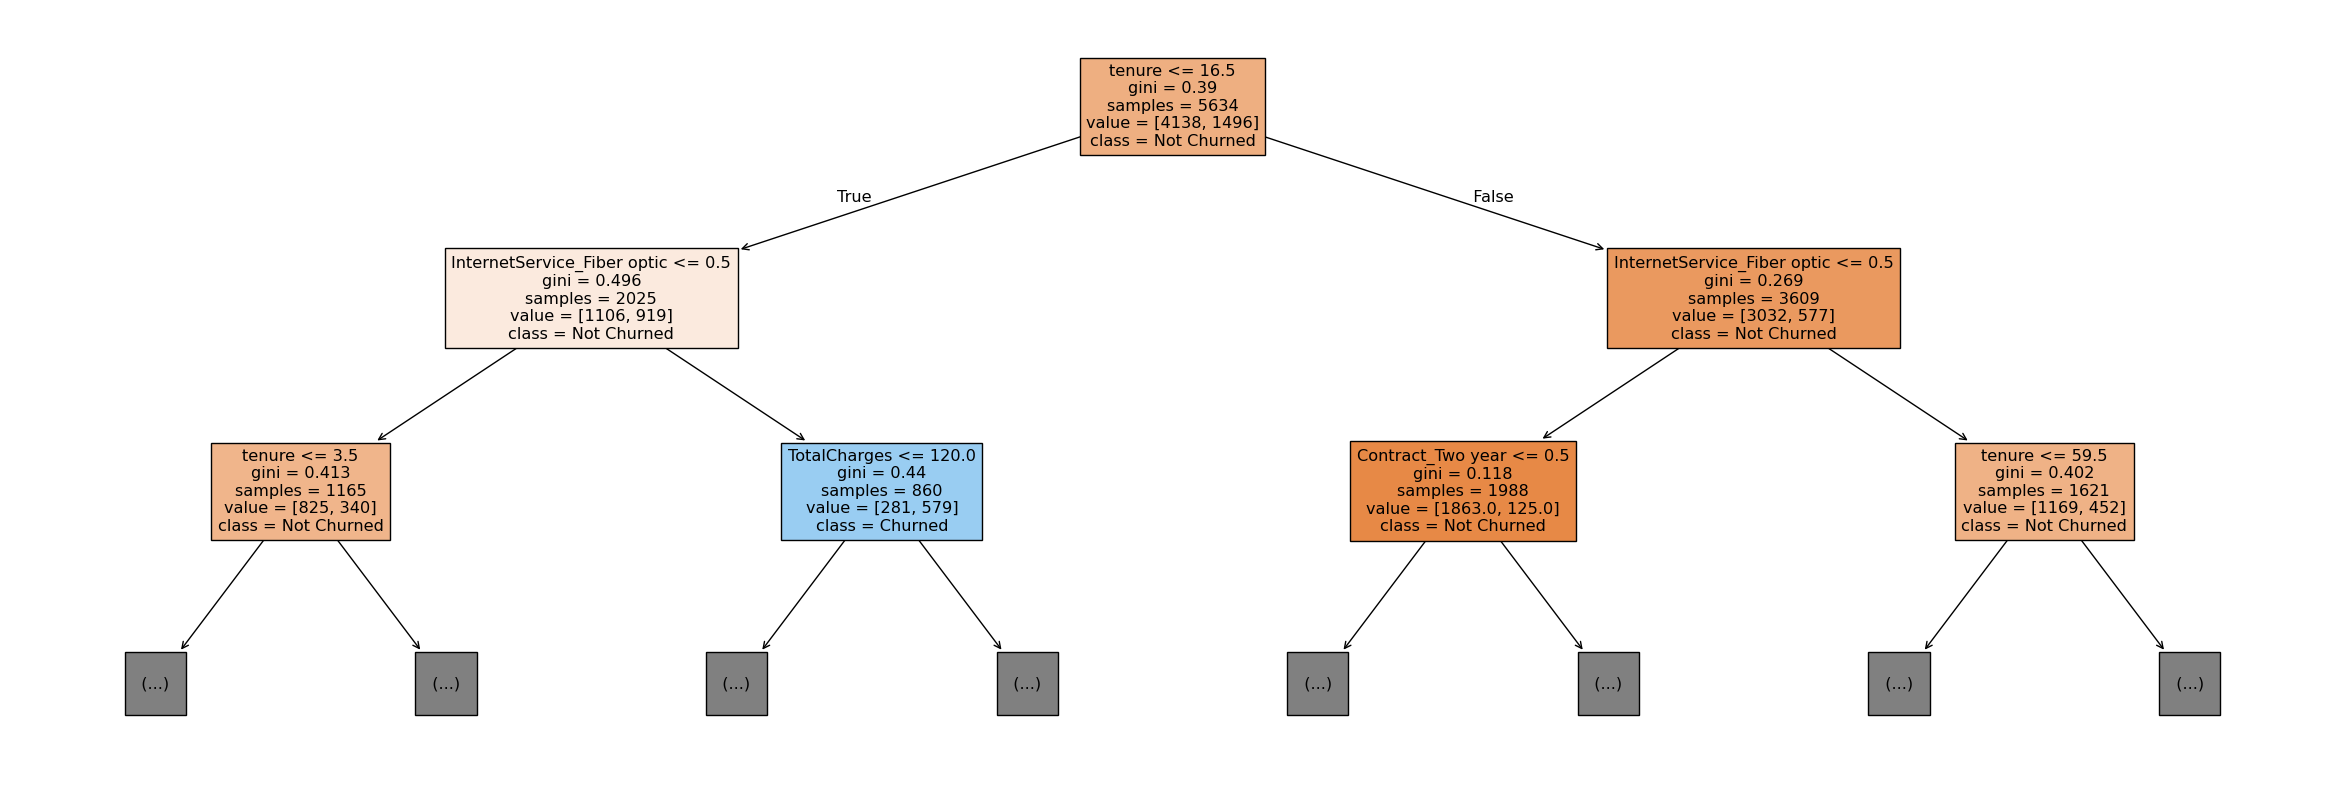

In [48]:
plt.figure(figsize=(30, 10))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=["Not Churned", "Churned"], max_depth=2)
plt.show()

*но при таком раскладе, информативная часть дерева очень страдает, следом, будет полноразмерная визуализация*

In [37]:
# Экспорт дерева в формат .dot и визуализация с Graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=["Not Churned", "Churned"],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Сохранение дерева в файл
graph  # Отображение дерева

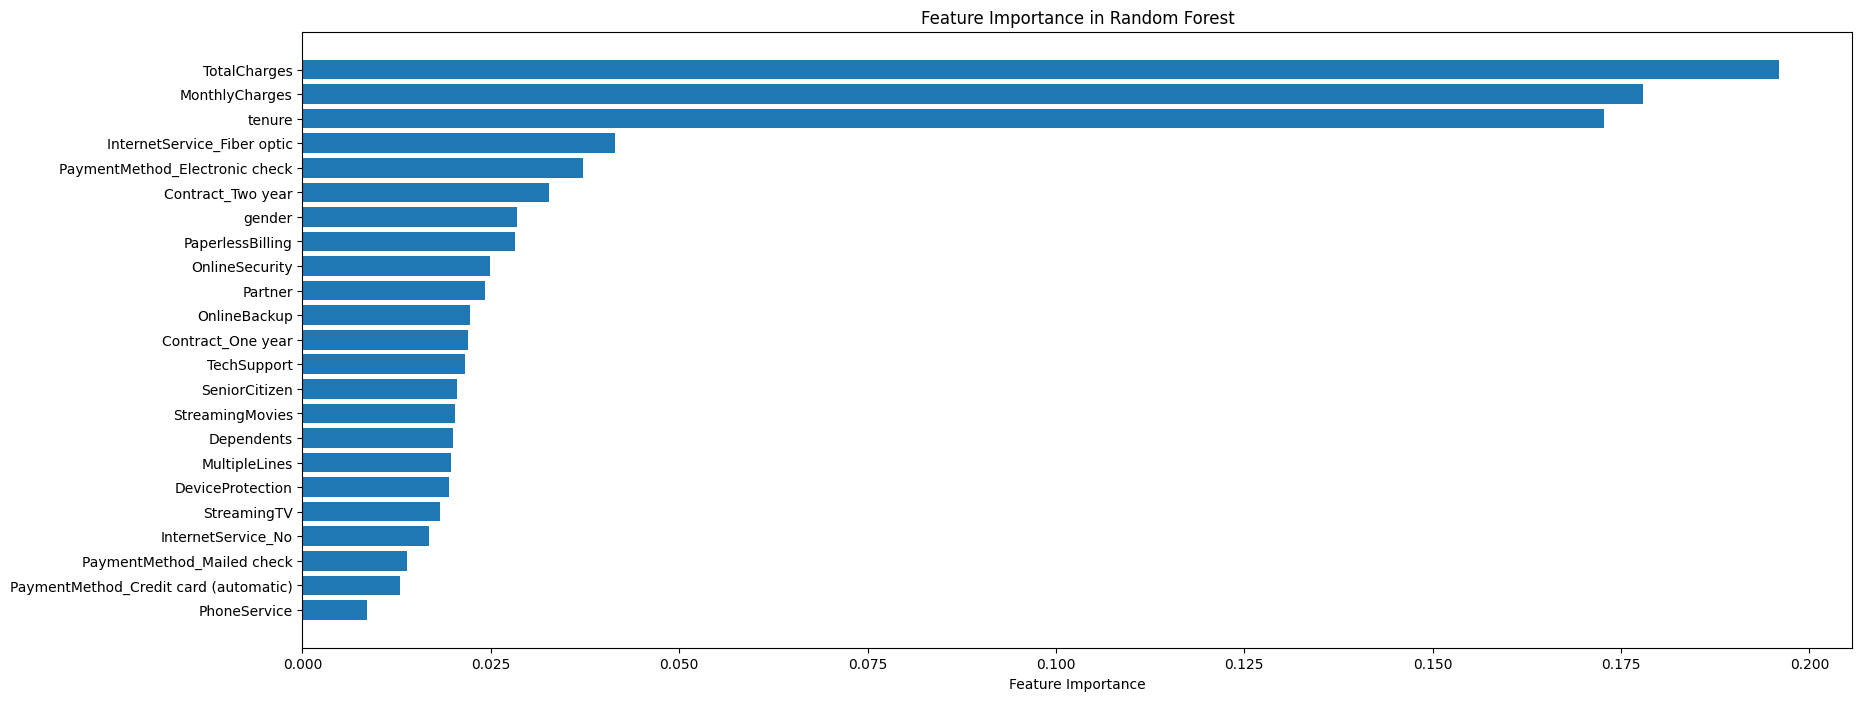

In [40]:
# Получение важности признаков
feature_importances = rf_clf.feature_importances_
features = X.columns

# Создание DataFrame для сортировки и визуализации
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Визуализация
plt.figure(figsize=(20, 8))
plt.barh(importance_df["Feature"], importance_df["Importance"])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest")
plt.gca().invert_yaxis()  # Переворачиваем ось для удобства
plt.show()

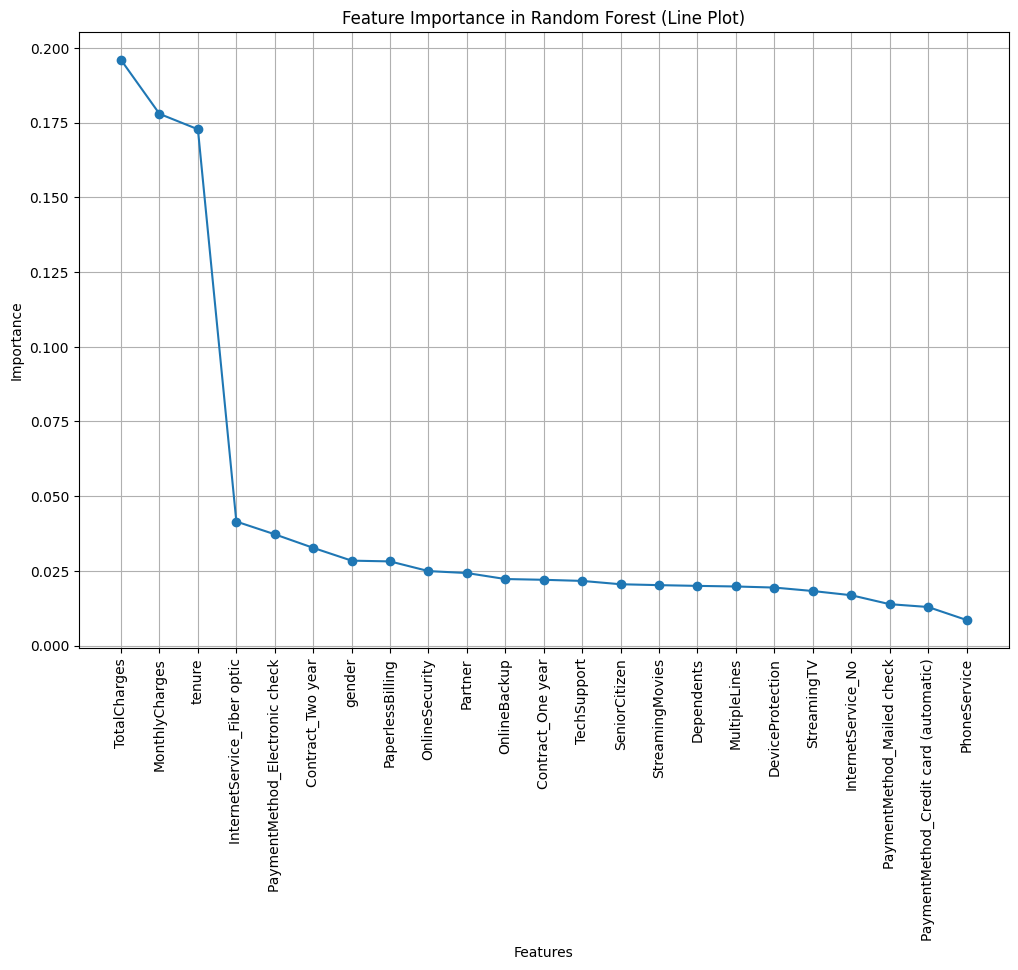

In [41]:
plt.figure(figsize=(12, 8))
plt.plot(importance_df["Feature"], importance_df["Importance"], marker='o')
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest (Line Plot)")
plt.grid()
plt.show()

*данные два графика дают нам понять, что на отток пользователей больше всего по влияли первые три признака которые фигурируют на обеих диаграммах*

**анализ adult income**

In [56]:
x_2 = adult_income_df.drop("income", axis=1)
y_2 = adult_income_df["income"]

In [57]:
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size=0.2, random_state=42)

In [58]:
tree_clf_2 = DecisionTreeClassifier(random_state=42)
tree_clf_2.fit(x_2_train, y_2_train)
y_pred_tree_2 = tree_clf_2.predict(x_2_test)

In [59]:
print("Decision Tree Accuracy (x_2):", accuracy_score(y_2_test, y_pred_tree_2))
print("Classification Report (x_2):\n", classification_report(y_2_test, y_pred_tree_2))
print("Confusion Matrix (x_2):\n", confusion_matrix(y_2_test, y_pred_tree_2))

Decision Tree Accuracy (x_2): 0.8132669983416252
Classification Report (x_2):
               precision    recall  f1-score   support

           0       0.87      0.88      0.88      6842
           1       0.62      0.60      0.61      2203

    accuracy                           0.81      9045
   macro avg       0.75      0.74      0.74      9045
weighted avg       0.81      0.81      0.81      9045

Confusion Matrix (x_2):
 [[6025  817]
 [ 872 1331]]


*если сравнивать с telco, можно сказать что тут модель справилась уже несколько лучше. Так же, по сравнению с предыдущим датасетом, adult income, испытывает меньше трудности при опредлении 1 класса*

In [60]:
rf_clf_2 = RandomForestClassifier(random_state=42)
rf_clf_2.fit(x_2_train, y_2_train)
y_pred_rf_2 = rf_clf_2.predict(x_2_test)

In [61]:
print("Random Forest Accuracy (x_2):", accuracy_score(y_2_test, y_pred_rf_2))
print("Classification Report (x_2):\n", classification_report(y_2_test, y_pred_rf_2))
print("Confusion Matrix (x_2):\n", confusion_matrix(y_2_test, y_pred_rf_2))

Random Forest Accuracy (x_2): 0.8507462686567164
Classification Report (x_2):
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6842
           1       0.73      0.61      0.67      2203

    accuracy                           0.85      9045
   macro avg       0.81      0.77      0.78      9045
weighted avg       0.84      0.85      0.85      9045

Confusion Matrix (x_2):
 [[6353  489]
 [ 861 1342]]


In [62]:
feature_importances_2 = rf_clf_2.feature_importances_
features_2 = x_2.columns

In [63]:
importance_df_2 = pd.DataFrame({"Feature": features_2, "Importance": feature_importances_2})
importance_df_2 = importance_df_2.sort_values(by="Importance", ascending=False)


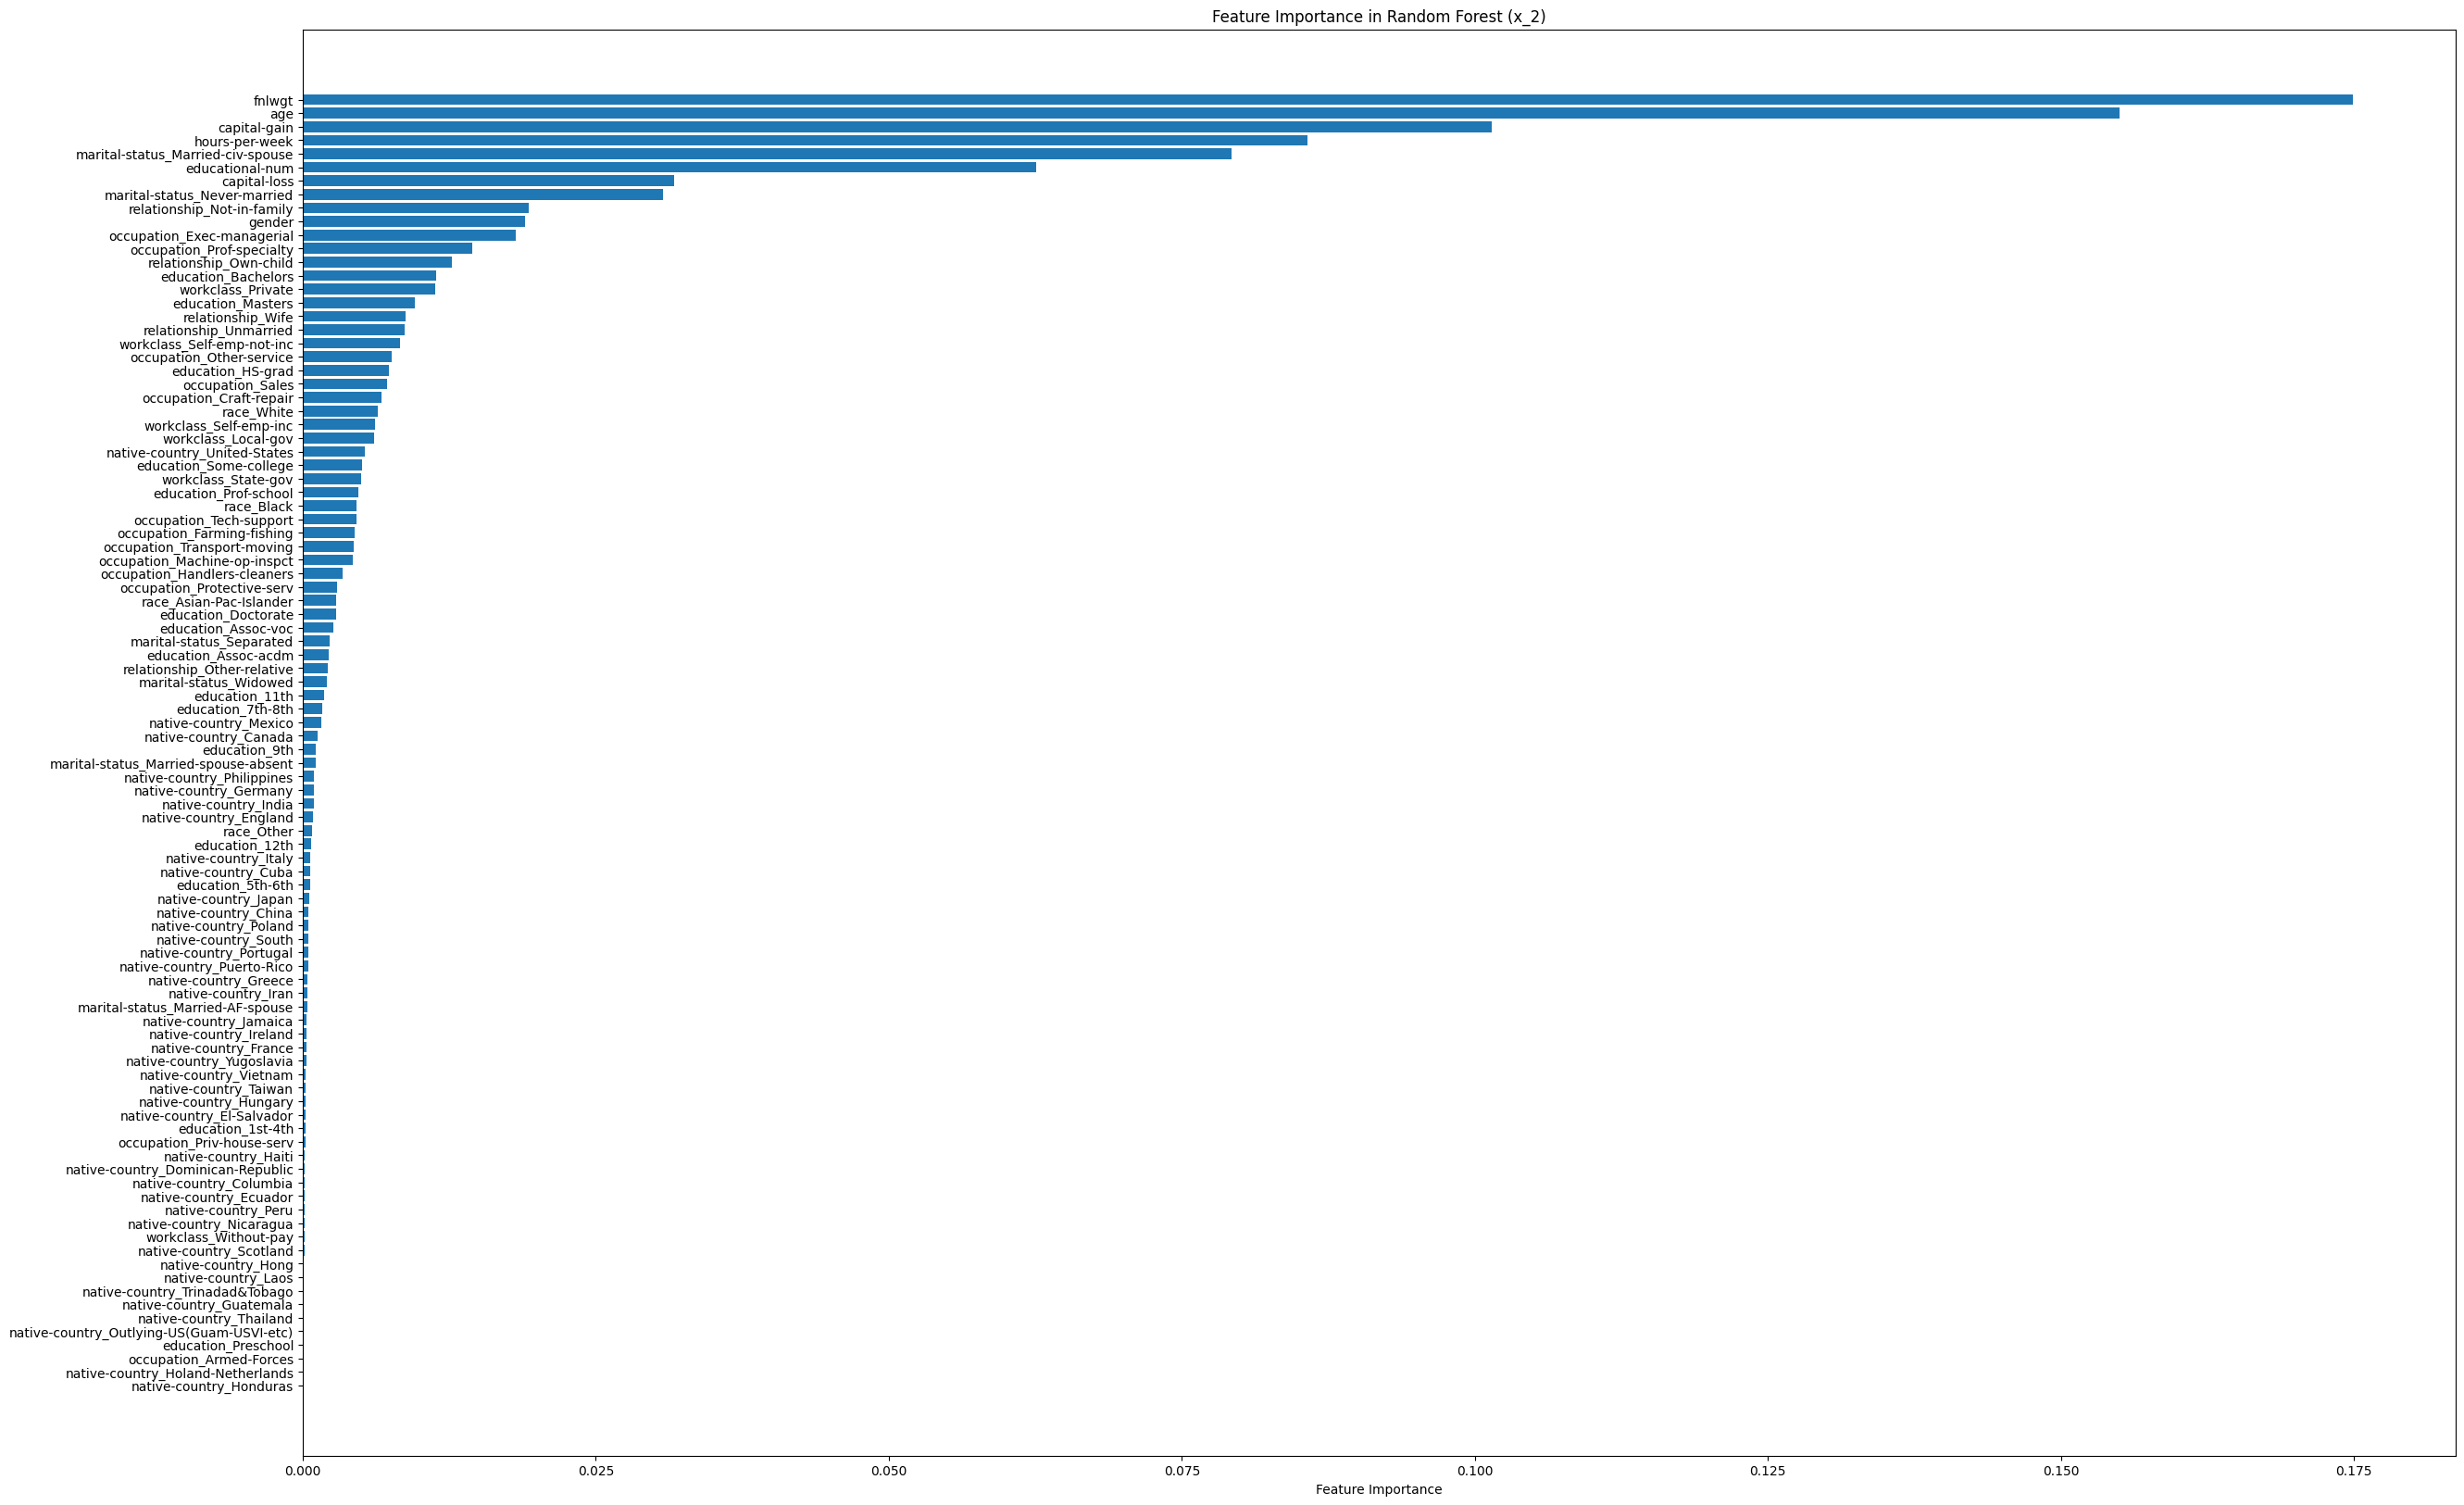

In [66]:
plt.figure(figsize=(30, 20))
plt.barh(importance_df_2["Feature"], importance_df_2["Importance"])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest (x_2)")
plt.gca().invert_yaxis()
plt.show()

*все бы ничего, но можем заметить что на первой позии указан fnlwgt, что может оказаться случайно скорелированным выводом, для проверки этого наверняка, попробую воссоздать модель без нее. Почему же оно тут не может быть? поскольку, это обычная практика, обозначающая признаки перепиши населения, это больше походит на уровень **популяции** чем определение зароботка.*

**пересматриваю модель**

In [68]:
x_3 = adult_income_df.drop(["income", "fnlwgt"], axis=1)
y_3 = adult_income_df["income"]

In [69]:
x_3_train, x_3_test, y_3_train, y_3_test = train_test_split(x_3, y_3, test_size=0.2, random_state=42)

In [70]:
tree_clf_3 = DecisionTreeClassifier(random_state=42)
tree_clf_3.fit(x_3_train, y_3_train)
y_pred_tree_3 = tree_clf_3.predict(x_3_test)

In [71]:
print("Decision Tree Accuracy (x_3):", accuracy_score(y_3_test, y_pred_tree_3))
print("Classification Report (x_3):\n", classification_report(y_3_test, y_pred_tree_3))
print("Confusion Matrix (x_3):\n", confusion_matrix(y_3_test, y_pred_tree_3))

Decision Tree Accuracy (x_3): 0.8168048645660586
Classification Report (x_3):
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      6842
           1       0.63      0.59      0.61      2203

    accuracy                           0.82      9045
   macro avg       0.75      0.74      0.75      9045
weighted avg       0.81      0.82      0.81      9045

Confusion Matrix (x_3):
 [[6093  749]
 [ 908 1295]]


In [72]:
rf_clf_3 = RandomForestClassifier(random_state=42)
rf_clf_3.fit(x_3_train, y_3_train)
y_pred_rf_3 = rf_clf_3.predict(x_3_test)

In [73]:
print("Random Forest Accuracy (x_3):", accuracy_score(y_3_test, y_pred_rf_3))
print("Classification Report (x_3):\n", classification_report(y_3_test, y_pred_rf_3))
print("Confusion Matrix (x_3):\n", confusion_matrix(y_3_test, y_pred_rf_3))

Random Forest Accuracy (x_3): 0.8444444444444444
Classification Report (x_3):
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      6842
           1       0.71      0.61      0.66      2203

    accuracy                           0.84      9045
   macro avg       0.80      0.76      0.78      9045
weighted avg       0.84      0.84      0.84      9045

Confusion Matrix (x_3):
 [[6298  544]
 [ 863 1340]]


In [74]:
feature_importances_3 = rf_clf_3.feature_importances_
features_3 = x_3.columns

In [75]:
importance_df_3 = pd.DataFrame({"Feature": features_3, "Importance": feature_importances_3})
importance_df_3 = importance_df_3.sort_values(by="Importance", ascending=False)

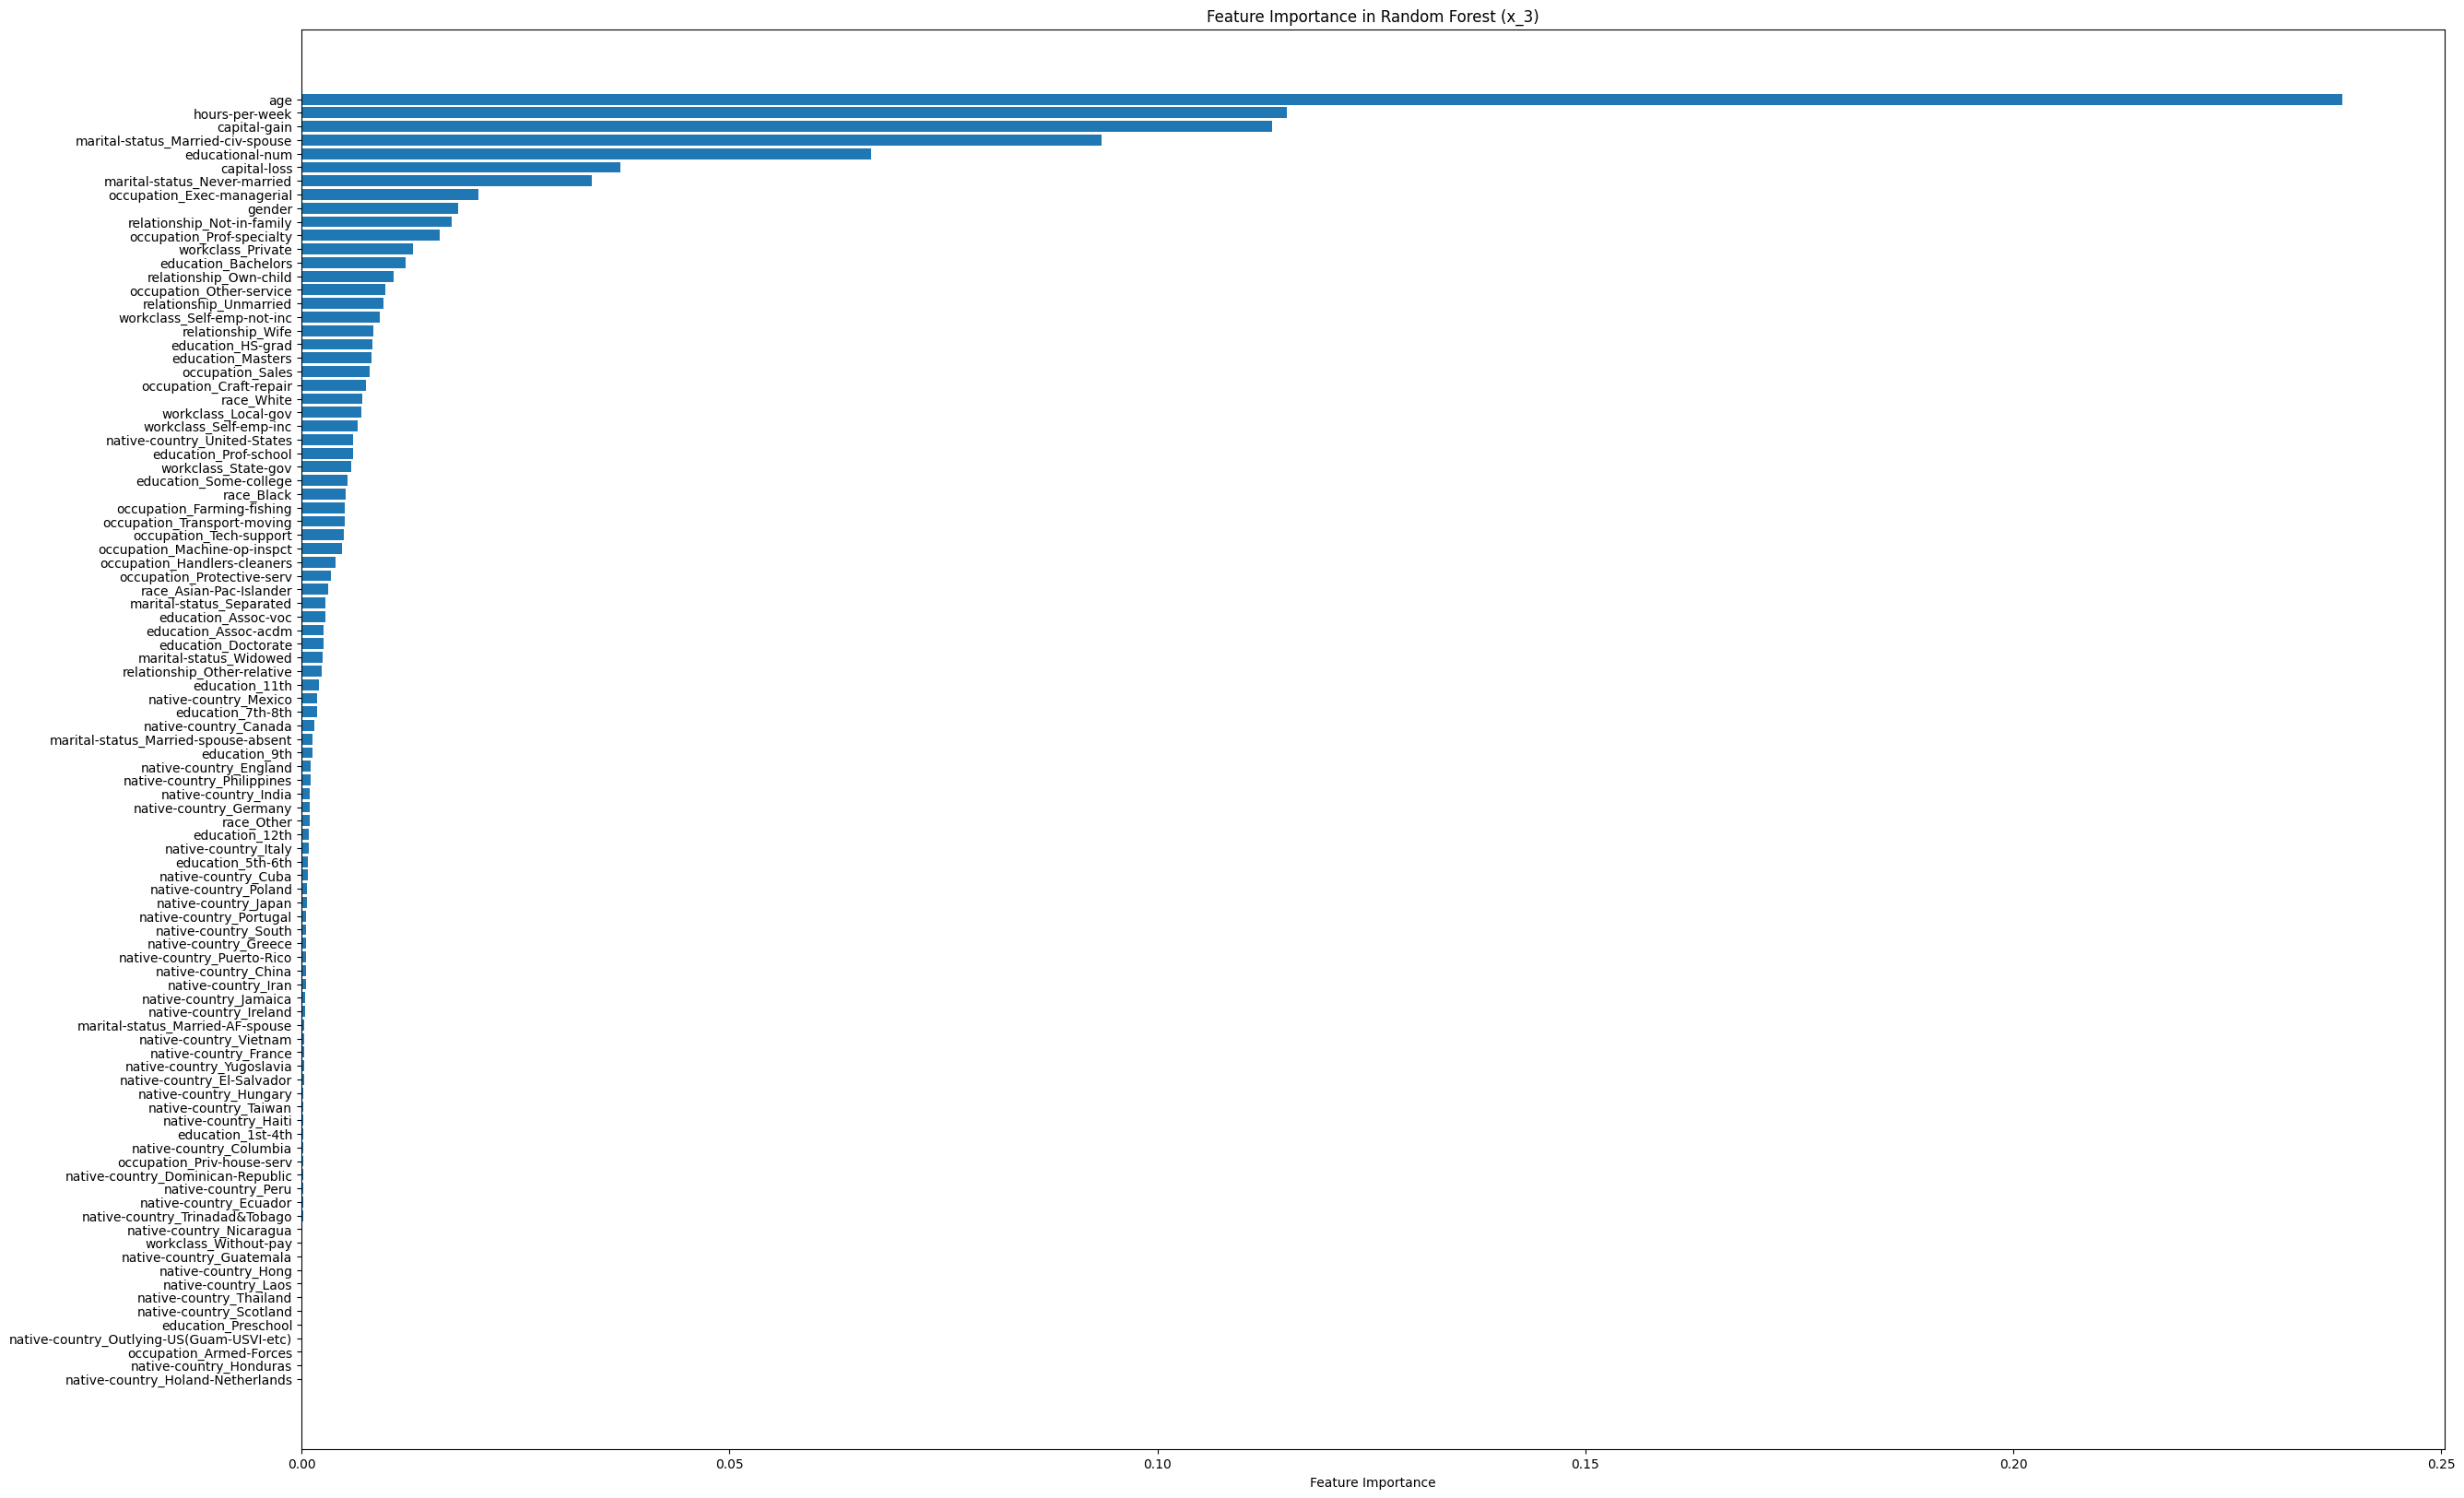

In [76]:
plt.figure(figsize=(30, 20))
plt.barh(importance_df_3["Feature"], importance_df_3["Importance"])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Random Forest (x_3)")
plt.gca().invert_yaxis()
plt.show()

*мои опосения насчет сдвига модели не подтвердилась, и на данном этапе наблюдаю то, что изменений в поведении модели не наблоюдается*

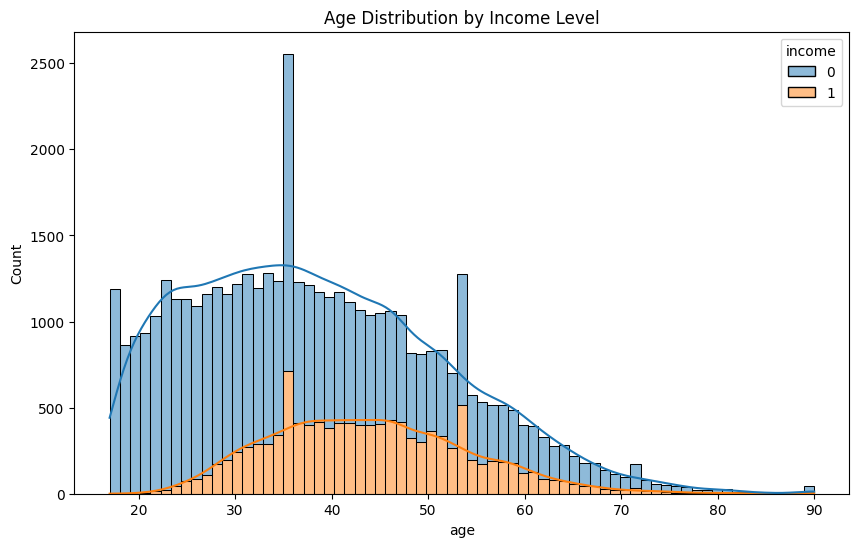

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(data=adult_income_df, x="age", hue="income", kde=True, multiple="stack")
plt.title("Age Distribution by Income Level")
plt.show()

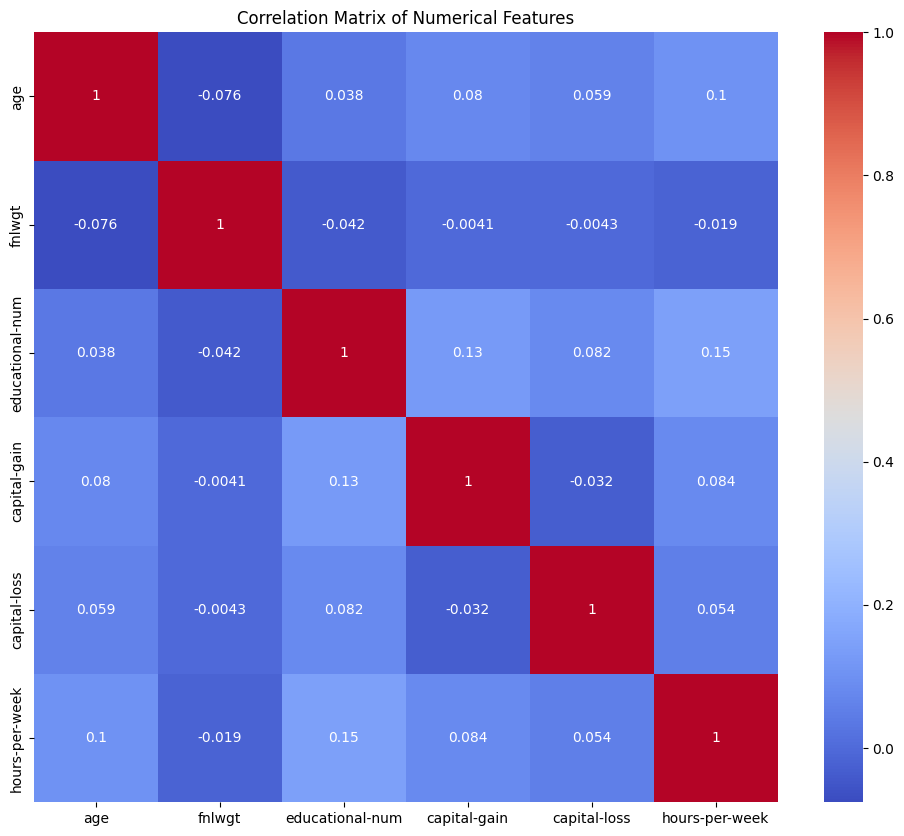

In [77]:
plt.figure(figsize=(12, 10))
sns.heatmap(adult_income_df[["age", "fnlwgt", "educational-num", "capital-gain", "capital-loss", "hours-per-week"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()